## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print(mouse_metadata.info())
#print(study_results.info())
# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [56]:
# Checking the number of mice in the DataFrame.
mouse_study_count = len(mouse_study["Mouse ID"].value_counts())
print(mouse_study_count)

249


In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_dup = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"], keep="last")]
#print(len(mouse_study_dup["Mouse ID"]))
#mouse_study_dup_MID = mouse_study_dup["Mouse ID"]
mouse_study_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_study_dup_MID_all = mouse_study[mouse_study.duplicated(["Mouse ID"])]
mouse_study_dup_MID_all = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
mouse_study_dup_MID_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = mouse_study[mouse_study["Mouse ID"] == "g989"].index
#print(indexNames)
mouse_study.drop(indexNames, inplace=True)
print(len(mouse_study["Mouse ID"].value_counts()))

248


In [88]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study["Mouse ID"].value_counts())

248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_er = mouse_study[["Drug Regimen","Tumor Volume (mm3)"]].copy()

mouse_study_des = pd.DataFrame()
mouse_study_des = mouse_study_er.groupby("Drug Regimen").mean()

mouse_study_des = mouse_study_des.rename(columns={"Tumor Volume (mm3)": "Mean"})
mouse_study_des["Med"] = mouse_study_er.groupby("Drug Regimen").median()
mouse_study_des["Var"] = mouse_study_er.groupby("Drug Regimen").var()
mouse_study_des["Std"] = mouse_study_er.groupby("Drug Regimen").std()
mouse_study_des["SEM"] = mouse_study_er.groupby("Drug Regimen").sem()
mouse_study_des

,Mean,Med,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#All performed in one line. Use .agg to accomplish this
mouse_study_agg = mouse_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
mouse_study_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

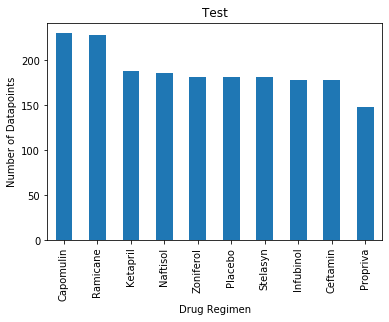

In [112]:
# Generate a bar plot showing the number of mice per time point for 
# each treatment throughout the course of the study using pandas. 

timepoints = mouse_study["Drug Regimen"].value_counts()

timepoints.plot(kind="bar", y='Number of Data Points', x='Drug Regimen', title="Test")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")
plt.show()

Text(0, 0.5, 'Drug Regimen')

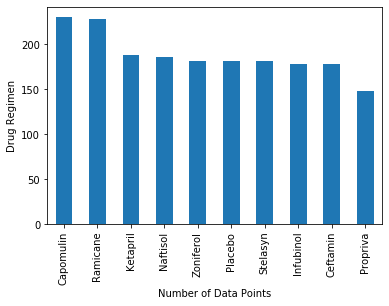

In [92]:
# Generate a bar plot showing the number of mice per time point for each 
# treatment throughout the course of the study using pyplot.
tp_chart = timepoints.plot(kind="bar")
tp_chart.set_xlabel("Number of Data Points")
tp_chart.set_ylabel("Drug Regimen")

## Pie Plots

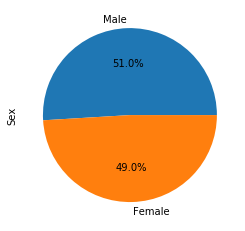

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_study["Sex"].value_counts()
gender_df
gender_df.plot(kind="pie", autopct="%1.1f%%")

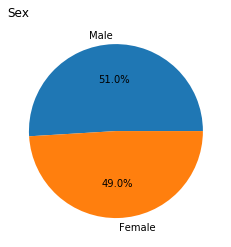

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, autopct="%1.1f%%", labels=gender_df.index)
plt.title(label="Sex", loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_study_qob = mouse_study[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].copy()
mouse_study_qob_final_volume = mouse_study_qob.loc[(mouse_study_qob["Drug Regimen"]=="Capomulin") | 
                                     (mouse_study_qob["Drug Regimen"]=="Ramicane") |
                                     (mouse_study_qob["Drug Regimen"]=="Infubinol") |
                                     (mouse_study_qob["Drug Regimen"]=="Ceftamin")]
mouse_study_qob_final_volume = mouse_study_qob_final_volume.groupby(["Drug Regimen", "Mouse ID"]).last()
mouse_study_qob_final_volume.reset_index(inplace=True)

#Calculating Outliers for Capomulin
mouse_study_qob_cap = mouse_study_qob_final_volume.loc[mouse_study_qob_final_volume ["Drug Regimen"] 
                                                       == "Capomulin"]
quartiles_cap = mouse_study_qob_cap["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_cap = quartiles_cap[.25]
upperq_cap = quartiles_cap[.75]
iqr_cap = upperq_cap - lowerq_cap
iqr_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
cap_outlier_occupancy = mouse_study_qob_cap.loc[(mouse_study_qob_cap["Tumor Volume (mm3)"] < lower_bound_cap) |
                                               (mouse_study_qob_cap["Tumor Volume (mm3)"] > upper_bound_cap)]
print(f"The lower quartile of occupancy is: {lowerq_cap}")
print(f"The upper quartile of occupancy is: {upperq_cap}")
print(f"The interquartile range of occupancy is: {iqr_cap}")
print(f"The the median of occupancy is: {quartiles_cap[0.5]} ")
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

cap_outlier_occupancy

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)


In [68]:
#Calculating Outliers for Ramicane
mouse_study_qob_ram = mouse_study_qob_final_volume.loc[mouse_study_qob_final_volume["Drug Regimen"] == "Ramicane"]
quartiles_ram = mouse_study_qob_ram["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_ram = quartiles_ram[.25]
upperq_ram = quartiles_ram[.75]
iqr_ram = upperq_ram - lowerq_ram
iqr_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
ram_outlier_occupancy = mouse_study_qob_ram.loc[(mouse_study_qob_ram["Tumor Volume (mm3)"] < lower_bound_ram) |
                                               (mouse_study_qob_ram["Tumor Volume (mm3)"] > upper_bound_ram)]

print(f"The lower quartile of occupancy is: {lowerq_ram}")
print(f"The upper quartile of occupancy is: {upperq_ram}")
print(f"The interquartile range of occupancy is: {iqr_ram}")
print(f"The the median of occupancy is: {quartiles_ram[0.5]} ")
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

ram_outlier_occupancy

The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)


In [69]:
#Calculating Outliers for Infubinol
mouse_study_qob_inf = mouse_study_qob_final_volume.loc[mouse_study_qob_final_volume["Drug Regimen"] == "Infubinol"]
quartiles_inf = mouse_study_qob_inf["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_inf = quartiles_inf[.25]
upperq_inf = quartiles_inf[.75]
iqr_inf = upperq_inf - lowerq_inf
iqr_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
inf_outlier_occupancy = mouse_study_qob_inf.loc[(mouse_study_qob_inf["Tumor Volume (mm3)"] < lower_bound_inf) |
                                               (mouse_study_qob_inf["Tumor Volume (mm3)"] > upper_bound_inf)]

print(f"The lower quartile of occupancy is: {lowerq_inf}")
print(f"The upper quartile of occupancy is: {upperq_inf}")
print(f"The interquartile range of occupancy is: {iqr_inf}")
print(f"The the median of occupancy is: {quartiles_inf[0.5]} ")
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

inf_outlier_occupancy

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
55,Infubinol,c326,5,36.321346


In [70]:
#Calculating Outliers for Ceftamin
mouse_study_qob_ceft = mouse_study_qob_final_volume.loc[mouse_study_qob_final_volume["Drug Regimen"] == "Ceftamin"]
quartiles_ceft = mouse_study_qob_ceft["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq_ceft = quartiles_ceft[.25]
upperq_ceft = quartiles_ceft[.75]
iqr_ceft = upperq_ceft - lowerq_ceft
iqr_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
ceft_outlier_occupancy = mouse_study_qob_ceft.loc[(mouse_study_qob_ceft["Tumor Volume (mm3)"] < lower_bound_ceft) |
                                               (mouse_study_qob_ceft["Tumor Volume (mm3)"] > upper_bound_ceft)]

print(f"The lower quartile of occupancy is: {lowerq_ceft}")
print(f"The upper quartile of occupancy is: {upperq_ceft}")
print(f"The interquartile range of occupancy is: {iqr_ceft}")
print(f"The the median of occupancy is: {quartiles_ceft[0.5]} ")
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")

ceft_outlier_occupancy

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)


[]

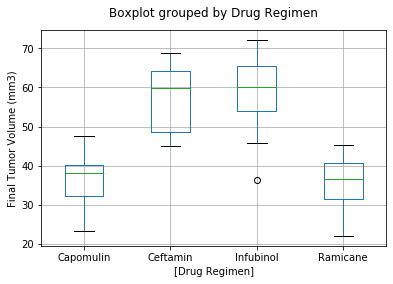

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, ax1 = plt.subplots()
mouse_study_box_plot = mouse_study_qob_final_volume[["Drug Regimen", 
                                                     "Tumor Volume (mm3)"]].boxplot(by="Drug Regimen")
mouse_study_box_plot.set_ylabel("Final Tumor Volume (mm3)")
mouse_study_box_plot.set_title("")
mouse_study_box_plot.plot()

## Line and Scatter Plots

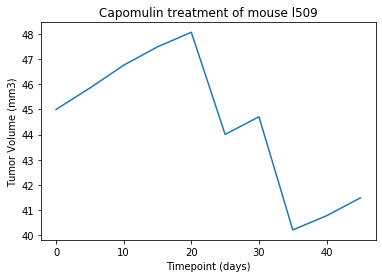

In [108]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_study_cap = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
mouse_study_cap = mouse_study_cap[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

temp = mouse_study_cap[["Timepoint", "Tumor Volume (mm3)"]].loc[mouse_study_cap["Mouse ID"] == "l509"]
plt.plot(temp["Timepoint"],  temp["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


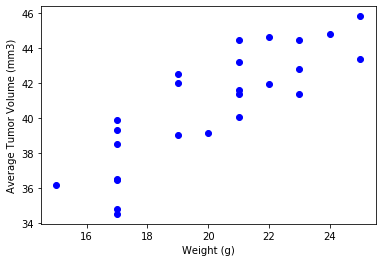

In [111]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_study_wvat = mouse_study.loc[(mouse_study["Drug Regimen"] == "Capomulin") ]
mouse_study_wvat = mouse_study_wvat[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
temp = mouse_study_wvat.groupby("Mouse ID").mean()
temp
plt.scatter(temp["Weight (g)"], temp["Tumor Volume (mm3)"], marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84


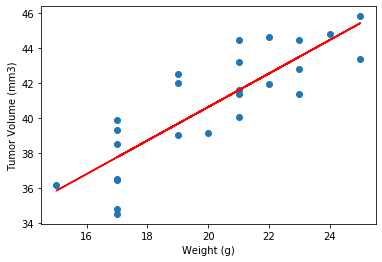

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(temp["Weight (g)"], temp["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(temp["Weight (g)"], temp["Tumor Volume (mm3)"])
regress_values = temp["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(temp["Weight (g)"], temp["Tumor Volume (mm3)"])
plt.plot(temp["Weight (g)"], regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()